In [1]:
from util_plot import *
from util_feature import * 
from util_other import *
from util_model import * 

No module named 'cufflinks'
No module named 'pandas_profiling'
os.getcwd /home/maxime/Documents/da-dev/da


In [2]:
file_path = 'data/airbnb/'

In [3]:
# Unzip all the docs as csv obviously

neighbourhoods = file_path+'neighbourhoods.csv'
listings = file_path+'listings.csv'
listings_summary = file_path+'listings_summary.csv'
reviews = file_path+'reviews.csv'
reviews_summary = file_path+'reviews_summary.csv'

In [4]:
df_neighb = pd.read_csv(neighbourhoods)
df_list = pd.read_csv(listings)
df_list_sum = pd.read_csv(listings_summary)
df_rev = pd.read_csv(reviews)
df_rev_sum = pd.read_csv(reviews_summary)

list_dataframes = [df_neighb, df_list, df_list_sum, df_rev, df_rev_sum]

In [5]:
shape_type_df = pd_dflist_shape(list_dataframes)

shape of dataframe 1 is: (139, 2)
shape of dataframe 2 is: (22552, 16)
shape of dataframe 3 is: (453, 96)
shape of dataframe 4 is: (401963, 2)
shape of dataframe 5 is: (15695, 6)


In [6]:
df_neighb.head()

,neighbourhood_group,neighbourhood
0,Charlottenburg-Wilm.,Barstraße
1,Charlottenburg-Wilm.,Charlottenburg Nord
2,Charlottenburg-Wilm.,Düsseldorfer Straße
3,Charlottenburg-Wilm.,Forst Grunewald
4,Charlottenburg-Wilm.,Grunewald


In [7]:
df_list.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2015,Berlin-Mitte Value! Quiet courtyard/very central,2217,Ian,Mitte,Brunnenstr. Süd,52.534537,13.402557,Entire home/apt,60,4,118,2018-10-28,3.76,4,141
1,2695,Prenzlauer Berg close to Mauerpark,2986,Michael,Pankow,Prenzlauer Berg Nordwest,52.548513,13.404553,Private room,17,2,6,2018-10-01,1.42,1,0
2,3176,Fabulous Flat in great Location,3718,Britta,Pankow,Prenzlauer Berg Südwest,52.534996,13.417579,Entire home/apt,90,62,143,2017-03-20,1.25,1,220


In [8]:
df_list.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [9]:
df_list_sum['space'][1]

"In the summertime we are spending most of our weekends in our little house in our garden and want to use the opportunity to rent a room in our cosy 2 bedroom apartment. But we might also stay in the other room. We will be very happy to give you tips on things to do and see in Berlin and make sure your stay runs smoothly. The room is about 25 square meters and is located on the 2nd floor. The bed measures 180 cm x 200 cm and is fitted with a kapok futon, which is a hard-ish mattress but which we find very pleasant to sleep on.  It's a typical Berlin-style apartment located in a friendly and calm neighborhood, plus your room is facing away from the street and into the interior area (so generally very quiet).  All the cafes, bars, shops and other action of the Prenzlauerberg district is easily accessible with a pleasant 10-15 minute stroll across Mauerpark. The main S-Bahn and U-Bahn public transport connections are also just a 10-15 minute walk away. There are all sorts of options for e

In [10]:
df_list_sum.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

In [11]:
df_rev.head(3)

,listing_id,date
0,2015,2016-04-11
1,2015,2016-04-15
2,2015,2016-04-26


In [12]:
df_rev_sum.head(10)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,2015,69544350,2016-04-11,7178145,Rahel,Mein Freund und ich hatten gute gemütliche vie...
1,2015,69990732,2016-04-15,41944715,Hannah,Jan was very friendly and welcoming host! The ...
2,2015,71605267,2016-04-26,30048708,Victor,Un appartement tres bien situé dans un quartie...
3,2015,73819566,2016-05-10,63697857,Judy,"It is really nice area, food, park, transport ..."
4,2015,74293504,2016-05-14,10414887,Romina,"Buena ubicación, el departamento no está orden..."
5,2015,74690922,2016-05-16,39859815,Eil,"Jan ist super flexibel und gut zu erreichen, w..."
6,2015,76603178,2016-05-28,29323516,Laurent,"We had a very nice stay in Berlin, thanks to J..."
7,2015,77296201,2016-05-31,9025122,Rasmus,"Great location close to Mauerpark, Kastanienal..."
8,2015,77834906,2016-06-03,39244464,Sabine,"Perfekte Lage, perfekte Ausstattung, perfekter..."
9,2015,82322683,2016-06-27,73902920,Mag,"Apartment very well located, close to everythi..."


Only looking at listings.csv, to get an idea of the functions

In [13]:
df_unique_values = pd_stat_col(df_list)
df_unique_values

,col,nunique,ratio,coltype
0,id,22552,1.000000,num
1,name,21873,0.969892,num
2,host_id,19180,0.850479,num
3,host_name,5997,0.265919,num
4,neighbourhood_group,12,0.000532,cat
5,neighbourhood,136,0.006031,num
6,latitude,22552,1.000000,num
7,longitude,22552,1.000000,num
8,room_type,3,0.000133,cat
9,price,295,0.013081,num


In [14]:
# One hot encoding of all the necessary columns

df_list = pd_col_to_onehot(df_list, ['room_type'])
df_list = pd_col_to_onehot(df_list, ['neighbourhood_group'])
df_list = pd_col_to_onehot(df_list, ['calculated_host_listings_count'])

room_type 3 (22552, 16)
neighbourhood_group 12 (22552, 18)
calculated_host_listings_count 23 (22552, 29)


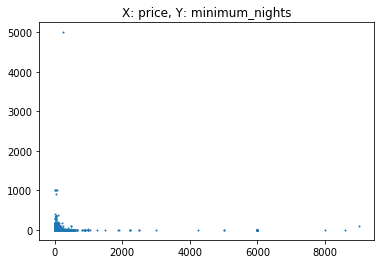

In [15]:
plot_pair(df_list, ['price'], ['minimum_nights'])

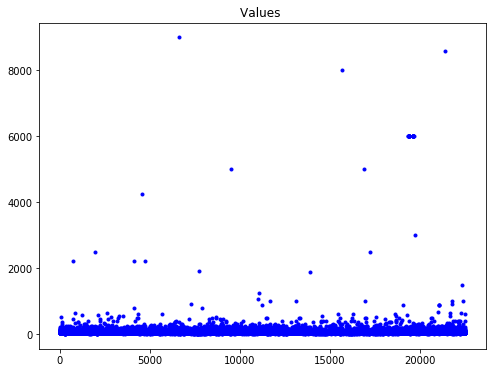

In [16]:
plot_Y(df_list['price'])

('NaN count:', 0, 'Unique count:', 295)
('Max:', 9000, 'Min:', 0)
('Median', 45.0, 'Mean:', 67.14366796736431, 'Std:', 220.2613265910614)


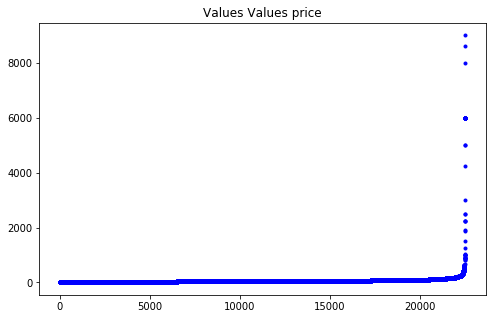

/home/maxime/anaconda3/envs/tf-gpu/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning:


The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.



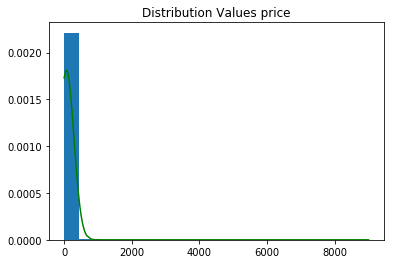

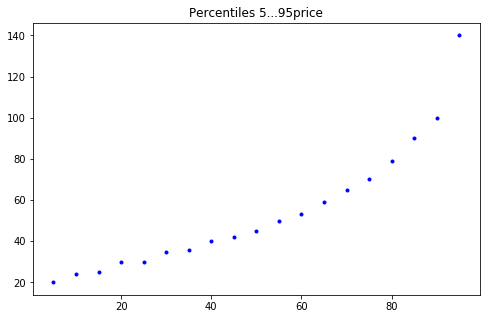

In [17]:
plot_col_distribution(df_list, ['price'])

Now work on listings_summary.csv

In [18]:
df_list_sum_tronc = df_list_sum

In [19]:
df_list_sum_tronc.shape

(453, 96)

In [20]:
df_list_sum_tronc[['price', 'cleaning_fee', 'extra_people', 'security_deposit']].head(3)

,price,cleaning_fee,extra_people,security_deposit
0,$60.00,$30.00,$28.00,$200.00
1,$17.00,$0.00,$0.00,$0.00
2,$90.00,$50.00,$20.00,$200.00


In [21]:
column_list = ['price', 'cleaning_fee', 'extra_people', 'security_deposit']
df_list_sum_tronc = pd_coltext_remove_text(df_list_sum_tronc, column_list, '$')

In [22]:
df_list_sum_tronc = pd_col_fill_na(df_list_sum_tronc, column_list, 0.0)

there are 0 empty values in price
there were 48 empty values in cleaning_fee
there are 48 empty values in cleaning_fee
there are 0 empty values in extra_people
there were 114 empty values in security_deposit
there are 114 empty values in security_deposit


As was seen in the plotting of the price, there are huge outliers in the price (some apartments are very expensive, but there are very few of those)

In [23]:
df_list_sum_tronc = pd_row_drop_above_thresh(df_list_sum_tronc, 'price', thresh=500)

('NaN count:', 0, 'Unique count:', 104)
('Max:', 506.0, 'Min:', 9.0)
('Median', 60.0, 'Mean:', 68.65342163355409, 'Std:', 45.23342908064752)


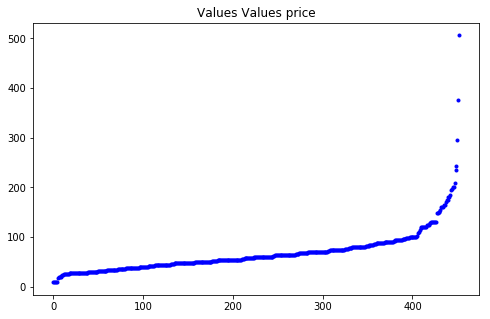

/home/maxime/anaconda3/envs/tf-gpu/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning:


The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.



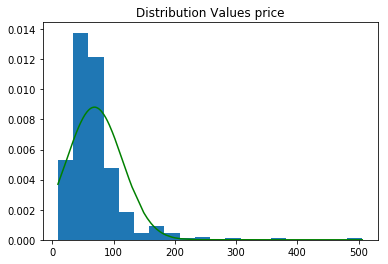

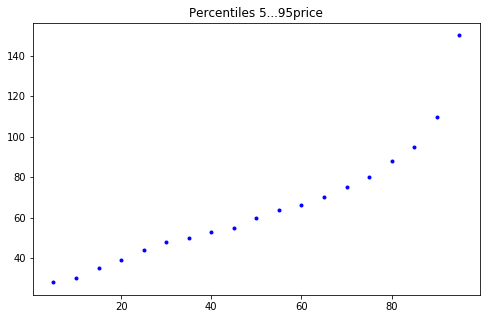

In [24]:
plot_col_distribution(df_list_sum_tronc, ['price'])

In [25]:
plot_cols_with_NaNs(df_list_sum_tronc, 10)

Out of 453 columns, the columns with most missing values are :
host_acceptance_rate     453
xl_picture_url           453
jurisdiction_names       453
medium_url               453
thumbnail_url            453
license                  350
square_feet              286
notes                    243
interaction              237
neighborhood_overview    211
dtype: int64


Following this, we can remove the columns with too many missing values

In [26]:
#df_list_sum_tronc = pd_col_remove(df_list_sum_tronc, ['square_feet'])

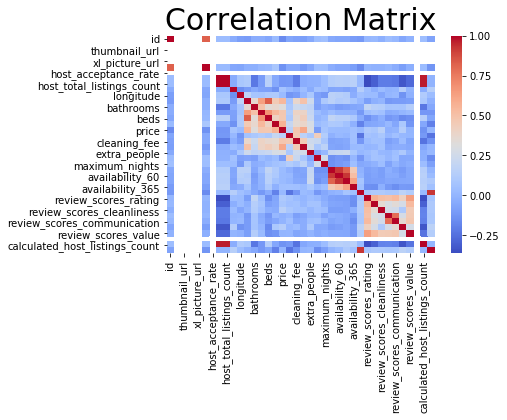

In [27]:
plot_col_correl_matrix(df_list_sum_tronc, df_list_sum_tronc.columns, annot=False)

In [28]:
plot_col_correl_target(df_list_sum_tronc, df_list_sum_tronc.columns, ['price'], nb_to_show=10, ascending=False)

Most correlated features to ['price'] are: 
                              price
price                      1.000000
guests_included            0.607970
square_feet                0.563523
accommodates               0.543297
cleaning_fee               0.480775
bedrooms                   0.475310
beds                       0.468457
bathrooms                  0.333832
extra_people               0.302841
review_scores_cleanliness  0.157984


In [29]:
plot_col_correl_target(df_list_sum_tronc, df_list_sum_tronc.columns, ['price'], nb_to_show=5, ascending=True)

Least correlated features to ['price'] are: 
                                   price
id                             -0.160341
host_id                        -0.136987
calculated_host_listings_count -0.129703
host_listings_count            -0.117068
host_total_listings_count      -0.117068


__Feature Engineering__

In [30]:
# Calculating the distance from the appartement to the center of Berlin

berlin_center = (52.5027778, 13.404166666666667)
df_list_sum_tronc = pd_col_add_distance_to_point(df_list_sum_tronc, berlin_center)

In [31]:
pd_coltext_word_frequency(df_list_sum_tronc, ['amenities'], nb_to_show=30)

,text,freq
0,Heating,448
1,Wifi,434
2,Kitchen,417
3,Essentials,362
4,Washer,358
5,Internet,349
6,Hair dryer,340
7,Hangers,310
8,TV,305
9,Hot water,291


In [32]:
# Add One hot encoding for some features in the appartment from what is inside 'amenities'

df_list_sum_tronc = pd_coltext_extract_tag(df_list_sum_tronc, 'Wifi', 'amenities')
df_list_sum_tronc = pd_coltext_extract_tag(df_list_sum_tronc, 'Laptop friendly workspace', 'amenities')
df_list_sum_tronc = pd_coltext_extract_tag(df_list_sum_tronc, 'TV', 'amenities')
df_list_sum_tronc = pd_coltext_extract_tag(df_list_sum_tronc, 'Free street parking', 'amenities')
df_list_sum_tronc = pd_coltext_extract_tag(df_list_sum_tronc, 'Elevator', 'amenities')
df_list_sum_tronc = pd_coltext_extract_tag(df_list_sum_tronc, 'Family/kid friendly', 'amenities')

In [33]:
# After that, just drop 'amenities' col:
#df_list_sum_tronc = pd_col_remove(df_list_sum_tronc, ['amenities'])

In [34]:
#columns_to_keep = ['id', 'space', 'description', 'host_has_profile_pic', 'neighbourhood_group_cleansed', 
#                   'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',  
#                   'bedrooms', 'bed_type', 'amenities', 'square_feet', 'price', 'cleaning_fee', 
#                   'security_deposit', 'extra_people', 'guests_included', 'minimum_nights',  
#                   'instant_bookable', 'is_business_travel_ready', 'cancellation_policy']

In [35]:
text = ['good', 'cozy', 'quiet', 'far', 'big', 'large', 'close', 'family', 'calm']

In [36]:
df_list_sum_tronc = pd_coltext_tfidf(df_list_sum_tronc, text, 'space')

(447, 9)


In [37]:
df_list_sum_tronc.head(2)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,Family/kid friendly,good,cozy,quiet,far,big,large,close,family,calm
0,2015.0,https://www.airbnb.com/rooms/2015,2.018111e+13,2018-11-07,Berlin-Mitte Value! Quiet courtyard/very central,Great location! 30 of 75 sq meters. This wood...,A+++ location! This „Einliegerwohnung“ is an e...,Great location! 30 of 75 sq meters. This wood...,none,It is located in the former East Berlin area o...,...,True,0.0,0.000000,0.301511,0.301511,0.0,0.0,0.301511,0.603023,0.603023
1,2695.0,https://www.airbnb.com/rooms/2695,2.018111e+13,2018-11-07,Prenzlauer Berg close to Mauerpark,NaN,In the summertime we are spending most of our ...,In the summertime we are spending most of our ...,none,NaN,...,False,0.0,0.707107,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.707107
